In [1]:
# Importando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Modelo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
bd = pd.read_csv('https://raw.githubusercontent.com/neylsoncrepalde/ML_classes/master/Data/Default.csv')
bd.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


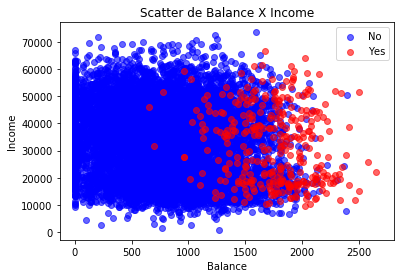

In [3]:
fig, ax = plt.subplots()
for i in ["No","Yes"]:
    if i == "No":
        ax.scatter(x=bd.loc[bd['default'] == i, "balance"],
        y=bd.loc[bd['default'] == i, 'income'],
        color="blue", alpha=0.6, label=i)
    else:
        ax.scatter(x=bd.loc[bd['default'] == i, "balance"],
        y=bd.loc[bd['default'] == i, 'income'],
        color="red", alpha=0.6, label=i)
ax.legend()
plt.xlabel("Balance")
plt.ylabel("Income")
plt.title("Scatter de Balance X Income")
plt.show()

In [4]:
# Extrair as dummies
bd1 = pd.get_dummies(bd, drop_first=True)
bd1.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [5]:
y = bd1.default_Yes
X = bd1[['balance', 'income', 'student_Yes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

## LDA

In [6]:
lda1 = LinearDiscriminantAnalysis(solver="eigen")

In [7]:
lda1.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [8]:
lda1.coef_

array([[ 1.03807061e-01,  1.38374719e-04, -9.89027905e+00]])

In [9]:
yhat = lda1.predict(X_test)
pd.crosstab(y_test, yhat)

col_0,0,1
default_Yes,,
0,2482,442
1,5,71


In [10]:
auc = roc_auc_score(y_test, yhat)
print('AUC for LDA: ', auc)

AUC for LDA:  0.8915238678090575


### QDA

In [27]:
# Implementando o QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [28]:
# Predição
yhat2 = qda.predict(X_test)
pd.crosstab(y_test, yhat2)

col_0,0,1
default_Yes,,
0,2909,15
1,53,23


In [29]:
auc2 = roc_auc_score(y_test, yhat2)
print('AUC for QDA: ', auc2)

AUC for QDA:  0.6487508099935201
